In [1]:
# %matplotlib widget

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from mpl_toolkits.mplot3d import Axes3D

# Redwood dataset: http://redwood-data.org/indoor/dataset.html

In [2]:
def visualize_rgbd(image: np.ndarray, depth: np.ndarray, angle=280) -> None:
    ''' visualize RGB image with depth
    
    Args:
      image (np.ndarray): uint8 RGB image
      depth (np.ndarray): uint16 depth map
    '''
    h, w, _ = image.shape

    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')

    x, y = np.meshgrid(range(w), range(h))

    x = np.reshape(x, -1)
    y = np.reshape(y, -1)
    d = np.reshape(depth, -1)
    colors = np.reshape(image, (-1, 3))/255    
    
    ax.set_xlabel('X')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Y')
    ax.set_xlim(0, w)
    ax.set_zlim(h, 0)

    ax.scatter(x, d, y, c=colors)
    ax.view_init(30, angle)

In [3]:
image_path = 'samples/00150.jpg'
depth_path = 'samples/00150.png'
print(image_path, depth_path)

image = cv2.imread(image_path)[:,:,::-1]
depth = cv2.imread(depth_path, cv2.IMREAD_ANYDEPTH)

samples/00150.jpg samples/00150.png


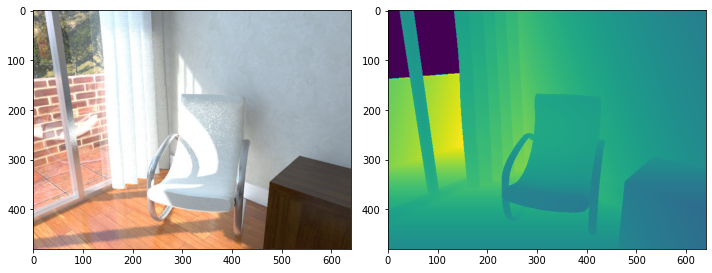

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

ax1.imshow(image)
ax2.imshow(depth)

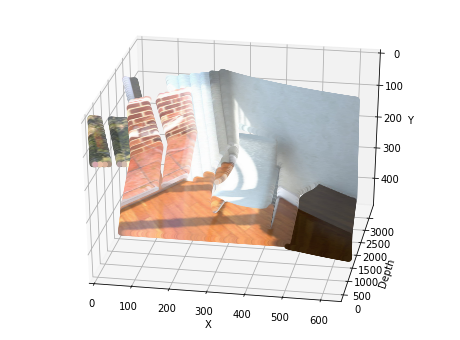

In [5]:
visualize_rgbd(image, depth)

In [6]:
sys.path.append('./AdaBins')

from AdaBins.infer import InferenceHelper

In [7]:
infer_helper = InferenceHelper(dataset='nyu', device='cpu') # nyu: indoor dataset

Loading base model ()...

Using cache found in /Users/dhirooka/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


In [8]:
image = Image.open(image_path)
centers, pred = infer_helper.predict_pil(image)

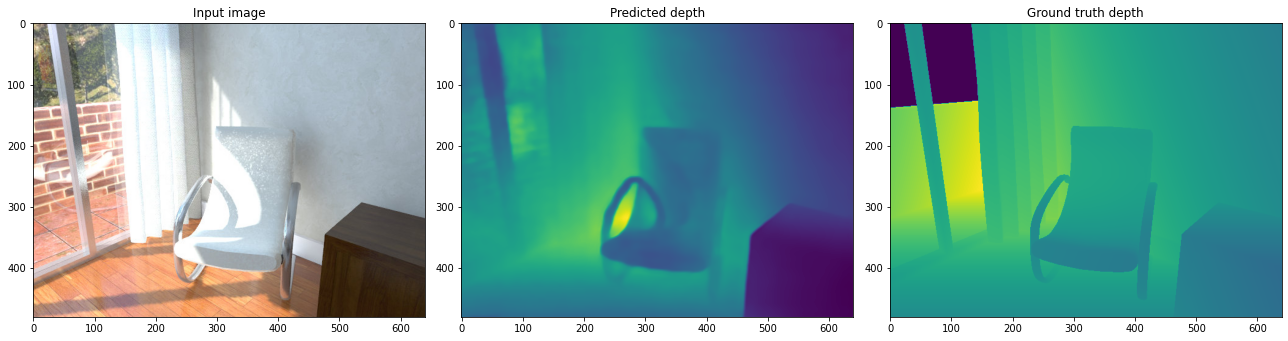

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), tight_layout=True)

ax1.set_title('Input image')
ax1.imshow(image)

ax2.set_title('Predicted depth')
ax2.imshow(pred.squeeze())

ax3.set_title('Ground truth depth')
ax3.imshow(depth)

N-bins: 256


(array([ 1., 28., 13.,  1., 31., 24., 24., 32., 24., 34., 39.,  2.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.32807946, 0.556271  , 0.7844626 , 1.0126542 , 1.2408457 ,
        1.4690373 , 1.6972288 , 1.9254204 , 2.153612  , 2.3818035 ,
        2.6099951 , 2.8381867 , 3.066378  , 3.2945697 , 3.5227613 ,
        3.750953  , 3.9791446 , 4.207336  , 4.435528  , 4.663719  ,
        4.8919106 , 5.1201024 , 5.348294  , 5.576485  , 5.804677  ,
        6.0328684 , 6.26106   , 6.4892516 , 6.717443  , 6.945635  ,
        7.173826  , 7.402018  , 7.6302094 ], dtype=float32),
 <a list of 32 Patch objects>)

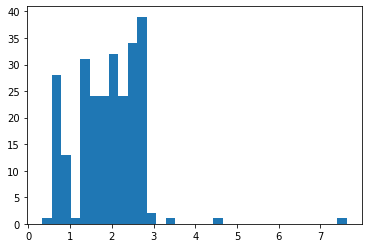

In [10]:
print(f'N-bins: {len(centers)}')
plt.hist(centers, bins=32)

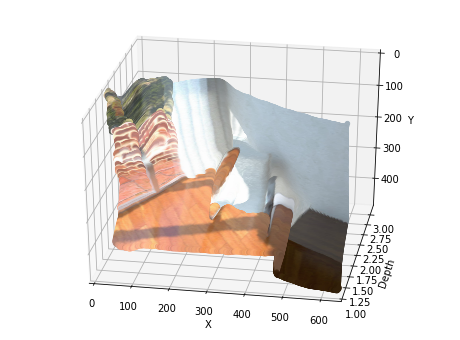

In [11]:
depth_pred = np.squeeze(pred)

visualize_rgbd(np.asarray(image), depth_pred)